## 1 - Statistics on GHG emissions :

### 1.1.1) Total emissions per commune, department and region:

I chose to create new dataframes for each results. For each question I will only print the first 10 lines of the auxiliar dataframe to check the structure of the dataframe.


In [140]:
import pandas as pd
file = 'emissions_communes_pandas.csv'
emissions_communes_df = pd.read_csv(file,index_col=0)
print(emissions_communes_df.shape)
emissions_communes_df.head()


(34857, 15)


C:\Users\arthu\AppData\Local\Temp\ipykernel_13172\3889099301.py:3: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  emissions_communes_df = pd.read_csv(file,index_col=0)


,region_code,region_name,departement_code,commune,population_totale,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire
commune_code_insee,,,,,,,,,,,,,,,
01001,84,Auvergne-Rhône-Alpes,01,L'Abergement-Clémenciat,848,3711.425991,592.746204,14363.357956,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172
01002,84,Auvergne-Rhône-Alpes,01,L'Abergement-de-Varey,273,475.330205,592.746204,14363.357956,140.741660,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207
01004,84,Auvergne-Rhône-Alpes,01,Ambérieu-en-Bugey,15240,499.043526,212.577908,14363.357956,10313.446515,5314.314445,998.332482,2930.354461,16616.822534,15642.420313,10732.376934
01005,84,Auvergne-Rhône-Alpes,01,Ambérieux-en-Dombes,1921,1859.160954,186.041362,14363.357956,1144.429311,216.217508,94.182310,276.448534,663.683146,1756.341319,782.404357
01006,84,Auvergne-Rhône-Alpes,01,Ambléon,113,448.966808,159.504815,14363.357956,77.033834,48.401549,662.569846,2423.127789,43.714019,398.786800,51.681756


In [141]:
nombre_codes_insee = emissions_communes_df.shape[0]
nombre_communes_differentes = emissions_communes_df['commune'].nunique()
print(f'Il y a {nombre_codes_insee} codes INSEE') 
print(f'Il y a {nombre_communes_differentes} communes avec un nom différent')

#On ne peut donc pas group_by sur les communes car des communes différentes portent le même nom, il n'y a donc pas de group_by possible vu que on va se limiter aux codes insee

emissions_communes_com = emissions_communes_df.groupby('commune_code_insee').sum()
emissions_communes_com['emissions_totales_com'] = emissions_communes_com[['agriculture_filled', 'transports_filled', 'transports_international_filled',
                                                'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
                                                'residentiel_filled', 'routier_filled', 'tertiaire']].sum(axis = 1)
emissions_communes_com.head()


Il y a 34857 codes INSEE
Il y a 32632 communes avec un nom différent


,region_code,population_totale,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire,emissions_totales_com
commune_code_insee,,,,,,,,,,,,,
85190,52,3583,7900.980576,438.160932,7.182665,3675.144730,25.319793,626.312359,1838.382751,2166.958714,9887.601535,2311.877544,28877.921600
85191,52,57824,21425.828706,720.482601,7.452469,53248.197512,5897.337637,9846.760474,39854.581565,72720.266743,67357.256809,39989.311463,311067.475979
85192,52,1002,3638.550696,518.496630,7.722274,1065.544969,119.283298,214.264754,628.920415,458.441608,925.288146,431.638367,8008.151158
85193,52,673,2158.715325,316.510660,7.992079,312.450751,77.758957,4.709115,13.822427,291.577552,775.551440,281.378448,4240.466753
85194,52,49766,2082.633032,114.524689,8.261884,8427.933213,117.743235,777.004055,2280.700406,28062.991086,10260.359715,6820.556146,58952.707460


First I group the data per cities, then I look the sum of each emissions categorie for each city. Then I call once again the sum function and I specify axis = 1 to have the total GHG emissions, all fileds included. 

In [142]:
print(emissions_communes_df['region_code'].nunique() == emissions_communes_df['region_name'].nunique()) #Il y a bien autant de code région que de noms de région différents

emissions_communes_reg = emissions_communes_df.groupby(['region_name'])[['commune','population_totale','agriculture_filled', 'transports_filled', 'transports_international_filled',
                                                'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
                                                'residentiel_filled', 'routier_filled', 'tertiaire']]

print(emissions_communes_df.shape[0] == emissions_communes_reg.size().sum())    #On vérifie quand même que on a le même nombre de données

emissions_communes_reg  = emissions_communes_reg.sum()
emissions_communes_reg['emissions_totales_reg'] = emissions_communes_reg[['agriculture_filled', 'transports_filled', 'transports_international_filled',
                                                'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
                                                'residentiel_filled', 'routier_filled', 'tertiaire']].sum(axis = 1)
emissions_communes_reg

True
True


,population_totale,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire,emissions_totales_reg
region_name,,,,,,,,,,,,
Auvergne-Rhône-Alpes,8284162,1.031350e+07,1.342678e+06,5.170909e+07,9.049687e+06,2.927622e+06,1.975891e+06,1.031638e+07,7.635458e+06,1.630149e+07,4.852093e+06,1.164239e+08
Bourgogne-Franche-Comté,2872386,7.980353e+06,8.549753e+05,1.037749e+05,4.348753e+06,5.529360e+05,5.817111e+05,3.243674e+06,3.420573e+06,7.862064e+06,1.806787e+06,3.075560e+07
Bretagne,3482543,7.504187e+06,9.850730e+05,1.059475e+06,3.304097e+06,6.428802e+05,3.979303e+05,1.588214e+06,2.869307e+06,6.439847e+06,2.064829e+06,2.685584e+07
Centre-Val de Loire,2630743,5.315298e+06,2.761943e+05,6.639561e+06,3.197044e+06,4.548959e+05,3.944193e+05,2.367102e+06,2.832040e+06,6.795221e+06,1.688812e+06,2.996059e+07
Corse,352559,4.952060e+05,3.063449e+05,1.554079e+06,8.837412e+05,2.916218e+04,9.457155e+04,7.632259e+04,1.433960e+05,6.096829e+05,1.826716e+05,4.375178e+06
Grand Est,5665457,8.698479e+06,1.723987e+06,5.092745e+06,7.285046e+06,1.228657e+06,1.444025e+06,1.246410e+07,7.339017e+06,1.253713e+07,3.686931e+06,6.150012e+07
Hauts-de-France,6085665,6.190136e+06,8.508160e+05,6.641745e+06,5.410846e+06,1.393559e+06,2.981296e+06,1.601233e+07,7.330335e+06,1.115630e+07,3.709996e+06,6.167736e+07
Normandie,3397867,6.833347e+06,4.167169e+05,1.662261e+07,3.895376e+06,8.026440e+05,4.835139e+06,8.118150e+06,3.283390e+06,7.016628e+06,2.133282e+06,5.395728e+07
Nouvelle-Aquitaine,6206404,1.259384e+07,2.762968e+06,2.647556e+07,7.068408e+06,1.414474e+06,6.762789e+05,5.212724e+06,5.765234e+06,1.374246e+07,3.621528e+06,7.933349e+07


In [143]:
emissions_communes_df['departement_code'].astype(str)

emissions_communes_dep = emissions_communes_df.groupby(['departement_code'])[['population_totale','agriculture_filled', 'transports_filled', 'transports_international_filled',
                                                'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
                                                'residentiel_filled', 'routier_filled', 'tertiaire']]

print(emissions_communes_dep.size().sum() == emissions_communes_df.shape[0])

emissions_communes_dep = emissions_communes_dep.sum()
emissions_communes_dep['emissions_totales_dep'] = emissions_communes_dep[['agriculture_filled', 'transports_filled', 'transports_international_filled',
                                                'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
                                                'residentiel_filled', 'routier_filled', 'tertiaire']].sum(axis = 1)
emissions_communes_dep.head()

True


,population_totale,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire,emissions_totales_dep
departement_code,,,,,,,,,,,,
85,295268,7.363769e+05,15313.973488,5.760747e+04,233453.498620,51160.632512,36257.834656,149952.247339,221831.521873,4.929403e+05,145107.187158,2.140002e+06
86,449593,1.213324e+06,139890.791610,3.917019e+06,568556.792770,80177.224097,49645.849973,179419.353571,422676.963787,1.175192e+06,281601.374138,8.027504e+06
87,378107,1.304467e+06,31801.463650,1.708013e+06,632604.104313,124012.662756,40945.759119,361727.491485,434477.491267,9.033191e+05,237985.704509,5.779353e+06
88,371434,8.904624e+05,88397.615763,3.679767e+04,476623.202217,91409.251713,101015.897018,454861.044354,474765.593559,9.406747e+05,246426.143392,3.801434e+06
89,341738,9.161874e+05,126796.838376,1.042224e+04,448218.426009,65979.080267,50775.071546,161380.499766,393003.109039,1.127041e+06,220333.321589,3.520137e+06


### 1.1.2 ) Total population per cities, region and department:
I just have to extract it from my auxiliar dataframes.

In [144]:
print('Le nombre d\'habitants par ville est :')
emissions_communes_com['population_totale'].head(10)

Le nombre d'habitants par ville est :


commune_code_insee
85190     3583
85191    57824
85192     1002
85193      673
85194    49766
85196     1961
85197     3854
85198     1390
85199      546
85200     1139
Name: population_totale, dtype: int64

In [145]:
print('Le nombre d\'habitants par région est :')
emissions_communes_reg['population_totale'].head(10)

Le nombre d'habitants par région est :


region_name
Auvergne-Rhône-Alpes       8284162
Bourgogne-Franche-Comté    2872386
Bretagne                   3482543
Centre-Val de Loire        2630743
Corse                       352559
Grand Est                  5665457
Hauts-de-France            6085665
Normandie                  3397867
Nouvelle-Aquitaine         6206404
Occitanie                  6144768
Name: population_totale, dtype: int64

In [146]:
print('Le nombre d\'habitants par département est :')
emissions_communes_dep['population_totale'].head(10)

Le nombre d'habitants par département est :


departement_code
85     295268
86     449593
87     378107
88     371434
89     341738
90     142623
91    1327467
92    1651161
93    1675249
94    1424088
Name: population_totale, dtype: int64

### 1.1.3) GHG emissions per sector

The sum function can be applied to each column and it gives the correct result

In [147]:
emissions_totales_df = emissions_communes_df[['agriculture_filled', 'transports_filled', 'transports_international_filled',
                                                'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
                                                'residentiel_filled', 'routier_filled', 'tertiaire']].sum()
print('Les valeurs affichées sont en tonnes de GHG')
emissions_totales_df.head(10)

Les valeurs affichées sont en tonnes de GHG


agriculture_filled                 8.560042e+07
transports_filled                  2.099790e+07
transports_international_filled    5.067629e+08
biomasse_hors-total_co2            6.303789e+07
dechets_filled                     1.452473e+07
energie_filled                     2.332664e+07
industrie_hors-energie_filled      8.525446e+07
residentiel_filled                 6.345621e+07
routier_filled                     1.250029e+08
tertiaire                          3.924325e+07
dtype: float64

I will also do it for each region and each department to have more detailed graphs.

In [148]:
emissions_communes_df['departement_code'].astype(str)

emissions_totales_dep = emissions_communes_df.groupby('departement_code')[['agriculture_filled', 'transports_filled', 'transports_international_filled',
                                                'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
                                                'residentiel_filled', 'routier_filled', 'tertiaire']]


print(emissions_totales_dep.size().sum() == emissions_communes_df.shape[0])



emissions_totales_dep = emissions_totales_dep.sum()
print('Les valeurs affichées sont en tonnes de GHG')
emissions_totales_dep.head(10)

True
Les valeurs affichées sont en tonnes de GHG


,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire
departement_code,,,,,,,,,,
85,7.363769e+05,1.531397e+04,5.760747e+04,2.334535e+05,51160.632512,36257.834656,149952.247339,2.218315e+05,4.929403e+05,145107.187158
86,1.213324e+06,1.398908e+05,3.917019e+06,5.685568e+05,80177.224097,49645.849973,179419.353571,4.226770e+05,1.175192e+06,281601.374138
87,1.304467e+06,3.180146e+04,1.708013e+06,6.326041e+05,124012.662756,40945.759119,361727.491485,4.344775e+05,9.033191e+05,237985.704509
88,8.904624e+05,8.839762e+04,3.679767e+04,4.766232e+05,91409.251713,101015.897018,454861.044354,4.747656e+05,9.406747e+05,246426.143392
89,9.161874e+05,1.267968e+05,1.042224e+04,4.482184e+05,65979.080267,50775.071546,161380.499766,3.930031e+05,1.127041e+06,220333.321589
90,7.429556e+04,1.175813e+04,1.390278e+03,2.422792e+05,18741.167557,21453.314701,63449.141676,1.686118e+05,2.681403e+05,88401.070415
91,1.571901e+05,1.632651e+06,8.922646e+06,7.187767e+05,293175.383972,104318.680722,364886.004497,1.270247e+06,2.015019e+06,747241.748820
92,6.159080e+04,1.308929e+04,1.183810e+05,1.067889e+06,264497.880711,242842.018012,706597.424067,1.466794e+06,1.198420e+06,836013.153414
93,2.018471e+03,8.371096e+04,2.753425e+06,7.259516e+05,252166.943778,102837.663903,433216.360990,1.316452e+06,1.400447e+06,863017.791777


In [149]:
emissions_totales_reg = emissions_communes_df.groupby('region_name')[['agriculture_filled', 'transports_filled', 'transports_international_filled',
                                                'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
                                                'residentiel_filled', 'routier_filled', 'tertiaire']]

print(emissions_totales_reg.size().sum() == emissions_communes_df.shape[0])


emissions_totales_reg = emissions_totales_reg.sum()
print('Les valeurs affichées sont en tonnes de GHG')
emissions_totales_reg.head(10)

True
Les valeurs affichées sont en tonnes de GHG


,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire
region_name,,,,,,,,,,
Auvergne-Rhône-Alpes,1.031350e+07,1.342678e+06,5.170909e+07,9.049687e+06,2.927622e+06,1.975891e+06,1.031638e+07,7.635458e+06,1.630149e+07,4.852093e+06
Bourgogne-Franche-Comté,7.980353e+06,8.549753e+05,1.037749e+05,4.348753e+06,5.529360e+05,5.817111e+05,3.243674e+06,3.420573e+06,7.862064e+06,1.806787e+06
Bretagne,7.504187e+06,9.850730e+05,1.059475e+06,3.304097e+06,6.428802e+05,3.979303e+05,1.588214e+06,2.869307e+06,6.439847e+06,2.064829e+06
Centre-Val de Loire,5.315298e+06,2.761943e+05,6.639561e+06,3.197044e+06,4.548959e+05,3.944193e+05,2.367102e+06,2.832040e+06,6.795221e+06,1.688812e+06
Corse,4.952060e+05,3.063449e+05,1.554079e+06,8.837412e+05,2.916218e+04,9.457155e+04,7.632259e+04,1.433960e+05,6.096829e+05,1.826716e+05
Grand Est,8.698479e+06,1.723987e+06,5.092745e+06,7.285046e+06,1.228657e+06,1.444025e+06,1.246410e+07,7.339017e+06,1.253713e+07,3.686931e+06
Hauts-de-France,6.190136e+06,8.508160e+05,6.641745e+06,5.410846e+06,1.393559e+06,2.981296e+06,1.601233e+07,7.330335e+06,1.115630e+07,3.709996e+06
Normandie,6.833347e+06,4.167169e+05,1.662261e+07,3.895376e+06,8.026440e+05,4.835139e+06,8.118150e+06,3.283390e+06,7.016628e+06,2.133282e+06
Nouvelle-Aquitaine,1.259384e+07,2.762968e+06,2.647556e+07,7.068408e+06,1.414474e+06,6.762789e+05,5.212724e+06,5.765234e+06,1.374246e+07,3.621528e+06


### 1.1.4) GHG emissions in transports field.

The function sum applied to the 2 columns give the wish result. As explain in part 2 the results can be overestimate 


In [150]:
emissions_totales_transports_df = emissions_communes_df[['transports_filled', 'transports_international_filled']].sum()
print(f'Le total d\'émission de la catégorie transports est {emissions_totales_transports_df.sum()} tonnes de GHG') 

Le total d'émission de la catégorie transports est 527760825.2221972 tonnes de GHG


## 1.2) GHG emisisons per person :

### 1.2.1) Per town :
Each time, It will be necessary to divide by the total population and to sum on the totality of the GHG emissions to have the ratio. Again I'll use the auxiliar dataframes created in the first part. Due to the potential mistake when dealing with the missing values in part 2, I'll probably get extreme values for most of the cities due to the international transports column.

In [151]:
emissions_communes_com['emissions_par_personne'] = emissions_communes_com['emissions_totales_com']/emissions_communes_com['population_totale']
print('Le nombre d\'émissions totales par personne par commune est de :')
emissions_communes_com['emissions_par_personne'].head()

Le nombre d'émissions totales par personne par commune est de :


commune_code_insee
85190    8.059705
85191    5.379557
85192    7.992167
85193    6.300842
85194    1.184598
Name: emissions_par_personne, dtype: float64

### 1.2.2) Par département 

In [152]:
emissions_communes_dep['emissions_totales_par_personne'] = emissions_communes_dep['emissions_totales_dep']/emissions_communes_dep['population_totale']
print('La quantité d\'émissions totales par personnes et par département est donné dans la série suivante :')
emissions_communes_dep['emissions_totales_par_personne'].head(10)

La quantité d'émissions totales par personnes et par département est donné dans la série suivante :


departement_code
85     7.247658
86    17.855047
87    15.284968
88    10.234479
89    10.300690
90     6.720656
91    12.223394
92     3.619341
93     4.735561
94     4.224278
Name: emissions_totales_par_personne, dtype: float64

### 1.2.3) Par région 

In [153]:
emissions_communes_reg['emissions_totales_par_personne'] = emissions_communes_reg['emissions_totales_reg']/emissions_communes_reg['population_totale']
print('La quantité d\'émissions totales par personnes et par région est donné dans la série suivante :')
emissions_communes_reg['emissions_totales_par_personne'].head(10)

La quantité d'émissions totales par personnes et par région est donné dans la série suivante :


region_name
Auvergne-Rhône-Alpes       14.053793
Bourgogne-Franche-Comté    10.707335
Bretagne                    7.711560
Centre-Val de Loire        11.388640
Corse                      12.409776
Grand Est                  10.855280
Hauts-de-France            10.134860
Normandie                  15.879752
Nouvelle-Aquitaine         12.782521
Occitanie                  13.503093
Name: emissions_totales_par_personne, dtype: float64

## 2) Visualisation of the datas 

In this part, I'll review the data and analye it thanks to useful graphics. I will use the library matplotlib. In this part I asked chatGPT to help me correct syntaxes's errors mostly and how to code somes useful feats with matplotlib (like rotating an axe). The online documentation of pandas serve me as a double check step when I used usual function (like loc, drop ...) to check the nature and order of the parameters.

In [154]:
import matplotlib.pyplot as plt

First I'll plot the GHG's emissions per person for each regions then for each department and finally for some cities.

Text(0, 0.5, 'Emissions totales par personnes en tonnes de GHG')

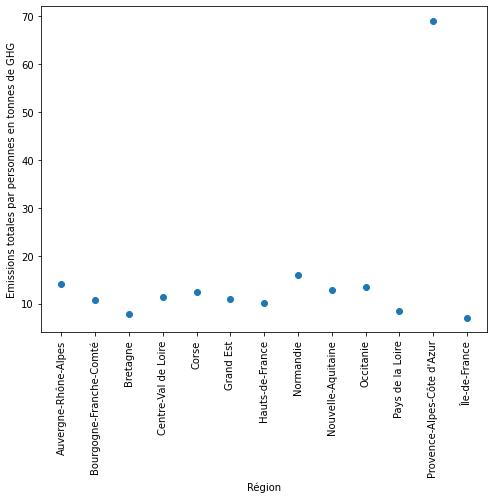

In [155]:
plt.figure(figsize = (8,6))
plt.scatter(emissions_communes_reg.index, emissions_communes_reg['emissions_totales_par_personne'])
plt.xticks(rotation = 90)
plt.xlabel('Région')
plt.ylabel('Emissions totales par personnes en tonnes de GHG')

I'm surprised that Ile de France is so low in terms of GHG's emissions per person compared to the PACA region which is above every others regions. It is probably linked to the population of each region that has a huge impact on the GHG's emissions.

Text(0, 0.5, "Nombre d'habitants")

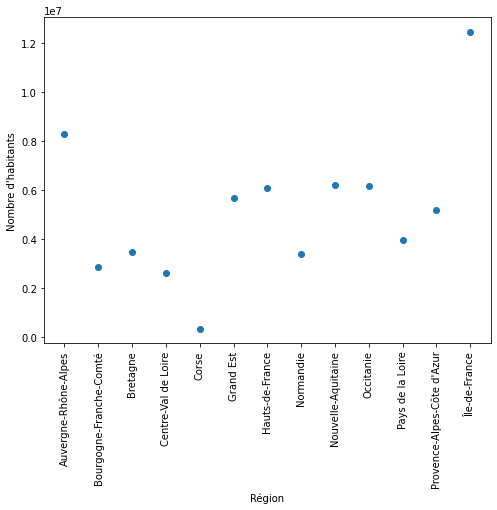

In [156]:
plt.figure(figsize = (8,6))
plt.scatter(emissions_communes_reg.index,emissions_communes_reg['population_totale'])
plt.xticks(rotation = 90)
plt.xlabel('Région')
plt.ylabel('Nombre d\'habitants')

So indeed in Ile de France, the number of inhabitants is high and this has an impact on the GHG emissions per person. To compare, PACA, that is less populated gets the reverse effect, and this explains why the GHG's emissions per person is so high. To have a better look on these datas I will plot a graph with these two informations on the same graph. I use chatGPT for the syntax and the web page : https://koor.fr/Python/Tutoriel_Scipy_Stack/matplotlib_multiples_diagrammes.wp
that present an example of a graph with two datasets.

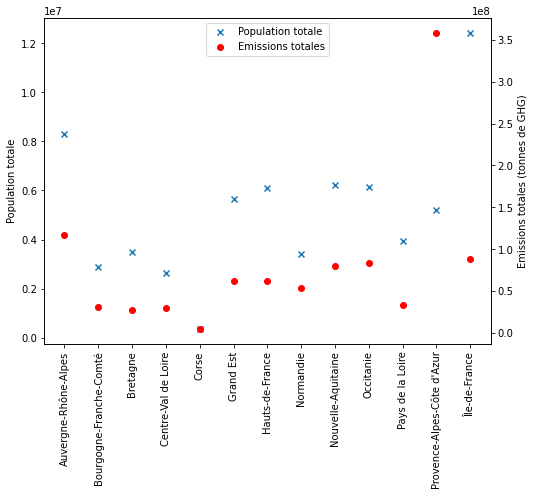

In [157]:
fig, ax1 = plt.subplots(figsize = (8,6))
ax1.scatter(emissions_communes_reg.index,emissions_communes_reg['population_totale'], marker = 'x', label = 'Population totale')
ax1.set_ylabel('Population totale')
plt.xticks(rotation = 90)
ax2 = ax1.twinx()

ax2.scatter(emissions_communes_reg.index,emissions_communes_reg['emissions_totales_reg'],color = 'red', marker = 'o', label = 'Emissions totales')
ax2.set_ylabel('Emissions totales (tonnes de GHG)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')

It is easier, with this graph, to understand why the PACA region is that much different compared to the others region. Indeed this is the most polluting region, probably due to the tourism activity, but also the least populated region (throughout the year it is only during summer that there is a peak of population), wich mean that the pollution per person is higher comapared to Ile de France. 

Now I plot the emissions's quantity for each department. For lisibility reasons I had to divided the database in two parts.

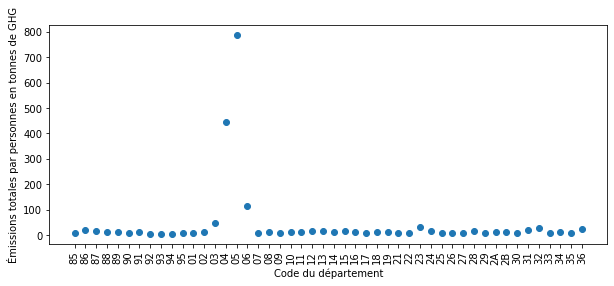

In [158]:
plt.figure(figsize = (10,8))

données_limités_début = emissions_communes_dep.head(emissions_communes_dep.shape[0]//2)

plt.scatter(range(len(données_limités_début)), données_limités_début['emissions_totales_par_personne'])

plt.xticks(ticks=range(len(données_limités_début)), labels=données_limités_début.index, rotation=90)

# Étiquettes et titre
plt.xlabel('Code du département')
plt.ylabel('Émissions totales par personnes en tonnes de GHG')
plt.subplots_adjust(bottom=0.5)



Departments 4 and 5 are way above others departments, to have a better look on the others departments I plot the same graph without 4 and 5.

I faced one problem when trying to plot the graphs. The department 2A and 2B triggered an error because matplotlib tried to convert these values to integers. To solve this problem I used chatGPT.

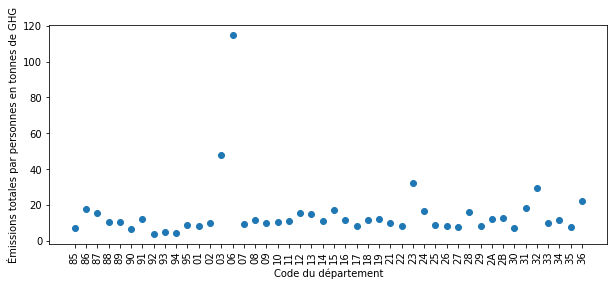

In [159]:
plt.figure(figsize = (10,8))

données_limités_début = emissions_communes_dep.head(emissions_communes_dep.shape[0]//2).drop(['04', '05'])

plt.scatter(range(len(données_limités_début)), données_limités_début['emissions_totales_par_personne'])

plt.xticks(ticks=range(len(données_limités_début)), labels=données_limités_début.index, rotation=90)

# Étiquettes et titre
plt.xlabel('Code du département')
plt.ylabel('Émissions totales par personnes en tonnes de GHG')
plt.subplots_adjust(bottom=0.5)

The 6th department flattens also the scale so I plot without 4,5 and 6

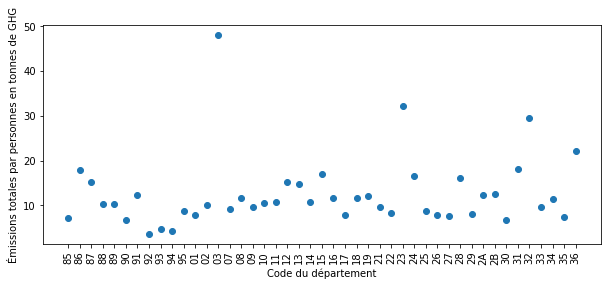

In [160]:
plt.figure(figsize = (10,8))

données_limités_début = emissions_communes_dep.head(emissions_communes_dep.shape[0]//2).drop(['04','05','06'])

plt.scatter(range(len(données_limités_début)), données_limités_début['emissions_totales_par_personne'])

plt.xticks(ticks=range(len(données_limités_début)), labels=données_limités_début.index, rotation=90)

# Étiquettes et titre
plt.xlabel('Code du département')
plt.ylabel('Émissions totales par personnes en tonnes de GHG')
plt.subplots_adjust(bottom=0.5)

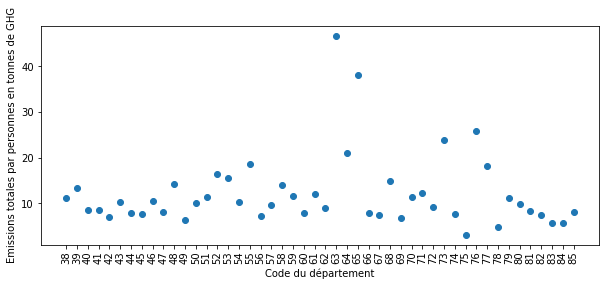

In [161]:
plt.figure(figsize = (10,8))

données_limités_début = emissions_communes_dep.tail((emissions_communes_dep.shape[0]//2))

plt.scatter(données_limités_début.index, données_limités_début['emissions_totales_par_personne'])

plt.xlabel('Code du département')
plt.ylabel('Emissions totales par personnes en tonnes de GHG')
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom=0.5)

Most of the departments have an emissions quantity between 10 and 20 tons of GHG per year. The mondial average is around 4.4 tons, and for a developped country like France around 8 tons of GHG. The surestimation is probably due to the transport international columns that has not been correctly treated. 

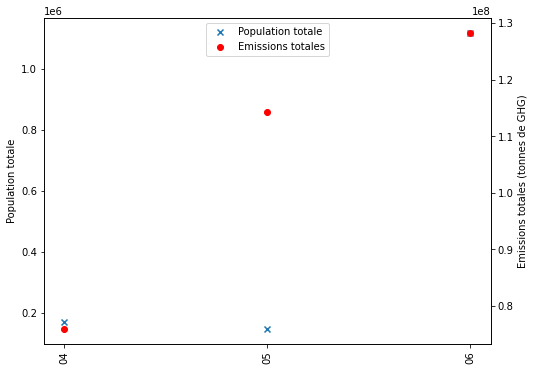

In [162]:
fig, ax1 = plt.subplots(figsize = (8,6))
selected_data = emissions_communes_dep.loc[['04', '05', '06']]
ax1.scatter(selected_data.index,selected_data['population_totale'], marker = 'x', label = 'Population totale')
ax1.set_ylabel('Population totale')
plt.xticks(rotation = 90)
ax2 = ax1.twinx()

ax2.scatter(selected_data.index,selected_data['emissions_totales_dep'],color = 'red', marker = 'o', label = 'Emissions totales')
ax2.set_ylabel('Emissions totales (tonnes de GHG)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')

Just like with the study on the region, there is a huge different between the total population and the quantity of emissions. To compare we look the same grph with the others datas.

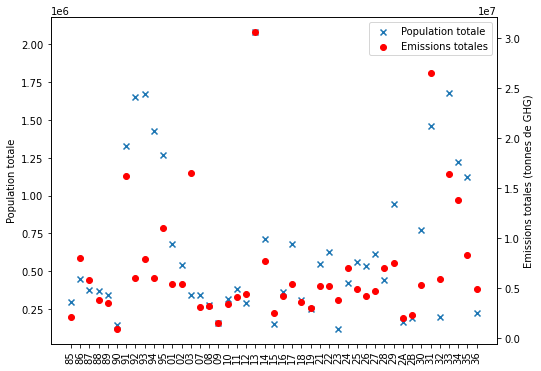

In [163]:
fig, ax1 = plt.subplots(figsize = (8,6))
selected_data = emissions_communes_dep.head((emissions_communes_dep.shape[0]//2)).drop(['04','05','06'])
ax1.scatter(range(len(selected_data)),selected_data['population_totale'], marker = 'x', label = 'Population totale')
ax1.set_ylabel('Population totale')
plt.xticks(ticks=range(len(selected_data)), labels=selected_data.index, rotation=90)
ax2 = ax1.twinx()

ax2.scatter(range(len(selected_data)),selected_data['emissions_totales_dep'],color = 'red', marker = 'o', label = 'Emissions totales')
ax2.set_ylabel('Emissions totales (tonnes de GHG)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

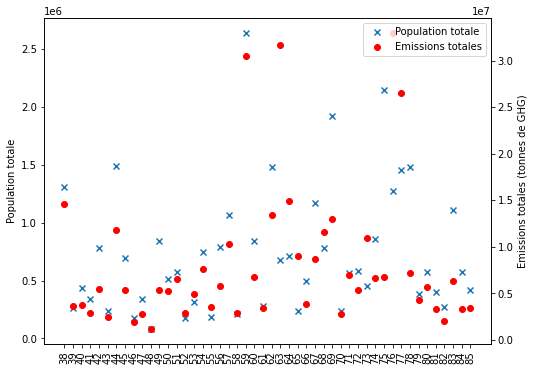

In [164]:
fig, ax1 = plt.subplots(figsize = (8,6))
selected_data = emissions_communes_dep.tail((emissions_communes_dep.shape[0]//2))
ax1.scatter(selected_data.index,selected_data['population_totale'], marker = 'x', label = 'Population totale')
ax1.set_ylabel('Population totale')
plt.xticks(rotation = 90)
ax2 = ax1.twinx()

ax2.scatter(selected_data.index,selected_data['emissions_totales_dep'],color = 'red', marker = 'o', label = 'Emissions totales')
ax2.set_ylabel('Emissions totales (tonnes de GHG)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

The majority of department have no major differences between population and emissions. The extreme values that we find can be caused by the error made on the transport columns when dealing with missing values.

It could be interessant to compare the pollution between cities, but the huge amount of cities would make the analysis unreadable. So I've decided to limit the grahs to some cities in France : The big cities like Paris, MArseille, Lille, Lyon, Bordeaux. And I've added the following : Nantes, Toulouse, Nice, Strasbourg, Grenoble, Montpellier, Orleans, brest. For Paris, Lyon and Marseille, the names are divided between each district of the city. Since I've not found a way to treat this faster, like this can exist in SQL with the key word 'LIKE', I have done it manually. 

Text(0, 0.5, 'Emissions par personne (tonnes GHG)')

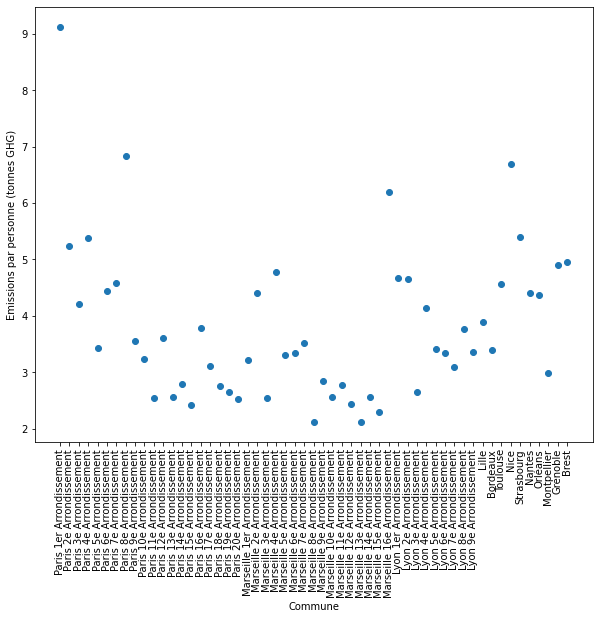

In [165]:
villes = ['Paris 1er Arrondissement', 'Paris 2e Arrondissement',  'Paris 3e Arrondissement', 'Paris 4e Arrondissement', 'Paris 5e Arrondissement',
          'Paris 6e Arrondissement', 'Paris 7e Arrondissement','Paris 8e Arrondissement', 'Paris 9e Arrondissement',
          'Paris 10e Arrondissement', 'Paris 11e Arrondissement', 'Paris 12e Arrondissement', 'Paris 13e Arrondissement',
          'Paris 14e Arrondissement', 'Paris 15e Arrondissement', 'Paris 16e Arrondissement', 'Paris 17e Arrondissement',
          'Paris 18e Arrondissement', 'Paris 19e Arrondissement', 'Paris 20e Arrondissement', 'Marseille 1er Arrondissement', 'Marseille 2e Arrondissement', 
          'Marseille 3e Arrondissement', 'Marseille 4e Arrondissement', 'Marseille 5e Arrondissement', 'Marseille 6e Arrondissement', 
          'Marseille 7e Arrondissement', 'Marseille 8e Arrondissement', 'Marseille 9e Arrondissement', 'Marseille 10e Arrondissement', 
          'Marseille 11e Arrondissement', 'Marseille 12e Arrondissement', 'Marseille 13e Arrondissement', 'Marseille 14e Arrondissement', 'Marseille 15e Arrondissement',
          'Marseille 16e Arrondissement', 'Lyon 1er Arrondissement', 'Lyon 2e Arrondissement', 'Lyon 3e Arrondissement',
          'Lyon 4e Arrondissement', 'Lyon 5e Arrondissement', 'Lyon 6e Arrondissement', 'Lyon 7e Arrondissement', 
          'Lyon 8e Arrondissement', 'Lyon 9e Arrondissement', 'Lille', 'Bordeaux', 'Toulouse', 'Nice', 'Strasbourg', 
          'Nantes', 'Orléans', 'Montpellier', 'Grenoble', 'Brest']
selected_data = emissions_communes_df.groupby('commune').sum()
selected_data['emissions_totales_com'] = selected_data[['agriculture_filled', 'transports_filled', 'transports_international_filled',
                                                'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
                                                'residentiel_filled', 'routier_filled', 'tertiaire']].sum(axis = 1)
selected_data['emissions_par_personne'] = selected_data['emissions_totales_com']/selected_data['population_totale']

selected_data = selected_data.loc[villes]
plt.figure(figsize = (10,8))
plt.scatter(selected_data.index, selected_data['emissions_par_personne'])
plt.xticks(rotation = 90)
plt.xlabel('Commune')
plt.ylabel('Emissions par personne (tonnes GHG)')




It is still a bit complicated to read because of the long names.

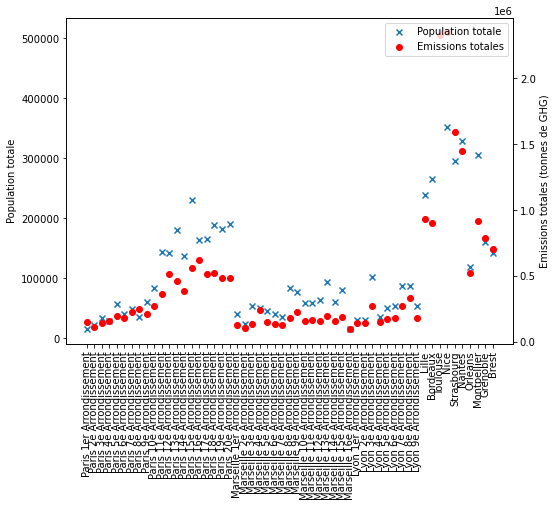

In [166]:
fig, ax1 = plt.subplots(figsize = (8,6))
selected_data = selected_data.loc[villes]
ax1.scatter(selected_data.index,selected_data['population_totale'], marker = 'x', label = 'Population totale')
ax1.set_ylabel('Population totale')
plt.xticks(rotation = 90)
ax2 = ax1.twinx()

ax2.scatter(selected_data.index,selected_data['emissions_totales_com'],color = 'red', marker = 'o', label = 'Emissions totales')
ax2.set_ylabel('Emissions totales (tonnes de GHG)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

Not suprisingly each distrct of great city are less polluting than others towns with less inhabitants but overall big cities like Paris or Marseille are more polluting when we look the total pollution. However since they are also more populated the pollution per person is less important. 

It is interressant to look upon the different emissions fields. I will plot the graphs of each emissions sectors for each regions. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

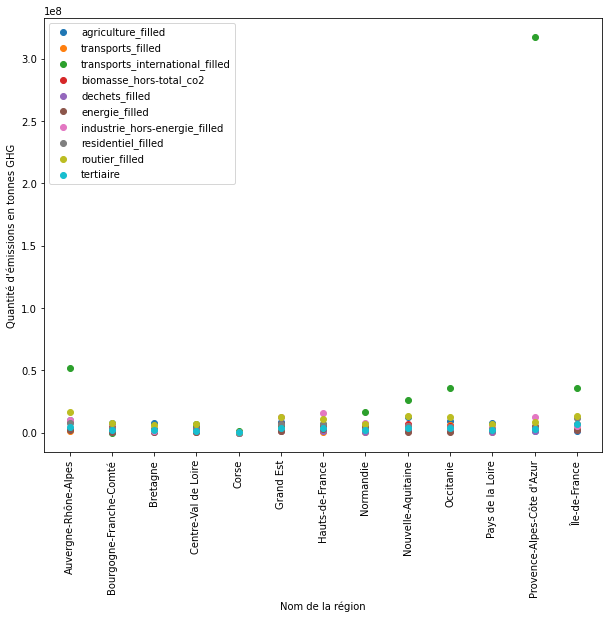

In [167]:
plt.figure(figsize = (10,8))
selected_data = emissions_totales_reg
colonnes = ['agriculture_filled', 'transports_filled', 'transports_international_filled',
            'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
            'residentiel_filled', 'routier_filled', 'tertiaire']
for c in colonnes :
    plt.scatter(selected_data.index, selected_data[c], label = c)
plt.ylabel('Quantité d\'émissions en tonnes GHG')
plt.xlabel('Nom de la région')
plt.legend()
plt.xticks(rotation = 90)

Since the international transport flatts the scale, i will plot the data without this categorie

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

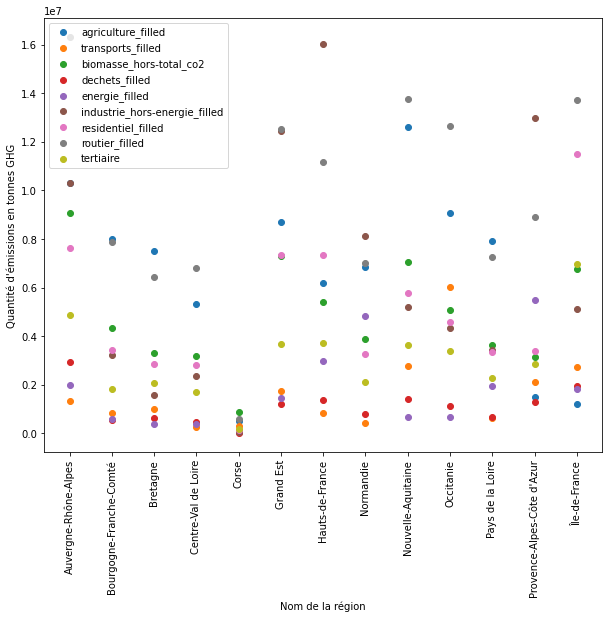

In [168]:
plt.figure(figsize = (10,8))
selected_data = emissions_totales_reg
colonnes = ['agriculture_filled', 'transports_filled',
            'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
            'residentiel_filled', 'routier_filled', 'tertiaire']
for c in colonnes :
    plt.scatter(selected_data.index, selected_data[c], label = c)
plt.ylabel('Quantité d\'émissions en tonnes GHG')
plt.xlabel('Nom de la région')
plt.legend()
plt.xticks(rotation = 90)

It is clear that the most polluting sectors (after banning the international transport) are the 'routier' sector and the 'industrie hors-energie', with an average of 10^7 tons of GHG emitted each year and by region.

It is also interesting to look only the transport categorie, which is often perceived to be the most polluting.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

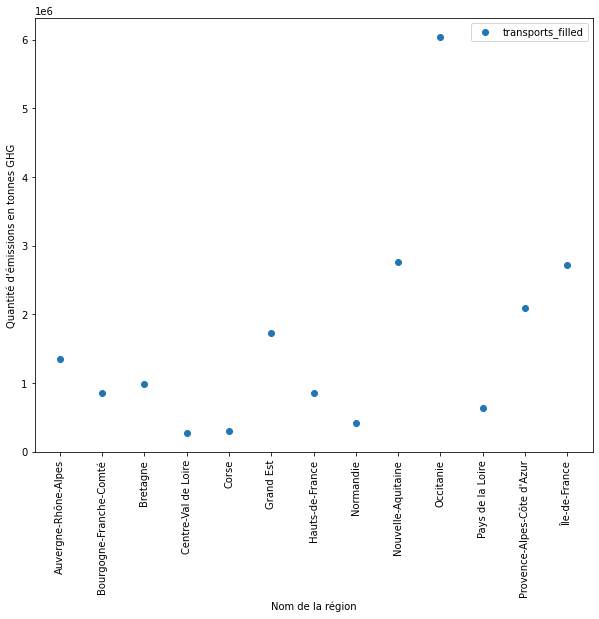

In [169]:
plt.figure(figsize = (10,8))
selected_data = emissions_totales_reg
colonnes = ['transports_filled']
for c in colonnes :
    plt.scatter(selected_data.index, selected_data[c], label = c)
plt.ylabel('Quantité d\'émissions en tonnes GHG')
plt.xlabel('Nom de la région')
plt.legend()
plt.xticks(rotation = 90)

With this graph, Occitanie appears to be the most polluting region in the transport field. It may be because it is th region the less well served by the rail network. So people have to find other way of transports that are more polluting (cars are one of them).

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

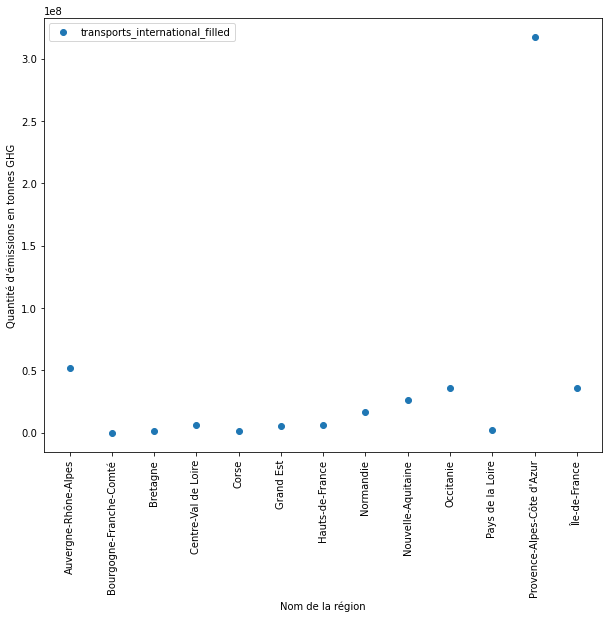

In [170]:
plt.figure(figsize = (10,8))
selected_data = emissions_totales_reg
colonnes = ['transports_international_filled']
for c in colonnes :
    plt.scatter(selected_data.index, selected_data[c], label = c)
plt.ylabel('Quantité d\'émissions en tonnes GHG')
plt.xlabel('Nom de la région')
plt.legend()
plt.xticks(rotation = 90)

I still plot the data related to the international transport, and it is the PACA region that appears to be the most polluting. It's consistent because it is one of the most attractive region for tourists, but it would be the only logical ones, other could be disproportionnate due to the potential mistreatment of missing values in part 2.